<a href="https://colab.research.google.com/github/nasibehmohammadi/Thesis/blob/main/1GRU_d4(UCIp_balance).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

file_path = "/content/UCIP_balanced.csv"
df = pd.read_csv(file_path)

print("üîç ÿ®ÿ±ÿ±ÿ≥€å €µ ÿ≥ÿ∑ÿ± ÿßŸàŸÑ ÿØ€åÿ™ÿßÿ≥ÿ™:")
print(df.head())

feature_columns = ["B","C"]
target_column = "A"

X_data = df[feature_columns].values
y_data = df[target_column].values

num_features = X_data.shape[1]

time_steps = 10
X_sequences = []
y_sequences = []

for i in range(len(X_data) - time_steps):
    X_sequences.append(X_data[i : i + time_steps])
    y_sequences.append(y_data[i + time_steps])

X_sequences = np.array(X_sequences)
y_sequences = np.array(y_sequences)

X_train, X_test, y_train, y_test = train_test_split(X_sequences, y_sequences, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
X_train = X_train.reshape(-1, num_features)
X_test = X_test.reshape(-1, num_features)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = X_train.reshape(-1, time_steps, num_features)
X_test = X_test.reshape(-1, time_steps, num_features)

model = Sequential([
    GRU(64, return_sequences=True, input_shape=(time_steps, num_features)),
    Dropout(0.2),
    GRU(32, return_sequences=False),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

loss, accuracy = model.evaluate(X_test, y_test)
print(f"‚úÖ ÿØŸÇÿ™ ŸÖÿØŸÑ ÿ±Ÿà€å ÿØÿßÿØŸá‚ÄåŸáÿß€å ÿ™ÿ≥ÿ™: {accuracy * 100:.2f}%")

test_sample = X_test[0].reshape(1, time_steps, num_features)
prediction = model.predict(test_sample)

if prediction > 0.5:
    print("üö® Ÿàÿ±ŸàÿØ ŸÖÿ¥⁄©Ÿà⁄©! ŸÜ€åÿßÿ≤ ÿ®Ÿá ÿßÿ≠ÿ±ÿßÿ≤ ŸáŸà€åÿ™ ÿ®€åÿ¥ÿ™ÿ±.")
else:
    print("‚úÖ Ÿàÿ±ŸàÿØ ÿß€åŸÖŸÜ ÿßÿ≥ÿ™.")

üîç ÿ®ÿ±ÿ±ÿ≥€å €µ ÿ≥ÿ∑ÿ± ÿßŸàŸÑ ÿØ€åÿ™ÿßÿ≥ÿ™:
     A         B         C
0  0.0  0.329245  0.278209
1  1.0  0.329245  0.723151
2  1.0  0.283796  0.874008
3  1.0  0.283796  0.874008
4  1.0  0.283796  0.874008


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
3486/3486 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 70s 18ms/step - accuracy: 0.9815 - loss: 0.0875 - val_accuracy: 0.9867 - val_loss: 0.0617
Epoch 2/10
3486/3486 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 63s 18ms/step - accuracy: 0.9865 - loss: 0.0635 - val_accuracy: 0.9868 - val_loss: 0.0617
Epoch 3/10
3486/3486 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 68s 20ms/step - accuracy: 0.9863 - loss: 0.0639 - val_accuracy: 0.9868 - val_loss: 0.0631
Epoch 4/10
3486/3486 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 79s 19ms/step - accuracy: 0.9863 - loss: 0.0635 - val_accuracy: 0.9868 - val_loss: 0.0617
Epoch 5/10
3486/3486 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 82s 19ms/step - accuracy: 0.9862 - loss: 0.0640 - val_accuracy: 0.9868 - val_loss: 0.0617
Epoch 6/10
3486/3486 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 82s 19ms/step - accuracy: 0.9864 - loss: 0.0632 - val_accu

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
from sklearn.metrics import f1_score

# 1Ô∏è‚É£ Ÿæ€åÿ¥‚Äåÿ®€åŸÜ€å ÿ®ÿ± ÿ±Ÿà€å ŸÖÿ¨ŸÖŸàÿπŸá ÿ™ÿ≥ÿ™
y_pred = model.predict(X_test)

# 2Ô∏è‚É£ ÿ™ÿ®ÿØ€åŸÑ ÿßÿ≠ÿ™ŸÖÿßŸÑÿßÿ™ ÿ®Ÿá ÿ®ÿ±⁄Üÿ≥ÿ®‚ÄåŸáÿß€å 0 Ÿà 1 (ÿß⁄Øÿ± ŸÖŸÇÿØÿßÿ± ÿßÿ≠ÿ™ŸÖÿßŸÑ > 0.5 ÿ®ÿßÿ¥ÿØÿå ⁄©ŸÑÿßÿ≥ 1 ÿßÿ≥ÿ™ÿå ÿØÿ± ÿ∫€åÿ± ÿß€åŸÜ ÿµŸàÿ±ÿ™ 0)
y_pred_classes = (y_pred > 0.5).astype(int)

# 3Ô∏è‚É£ ŸÖÿ≠ÿßÿ≥ÿ®Ÿá F1-Score
f1 = f1_score(y_test, y_pred_classes)

print(f"üéØ F1-Score ŸÖÿØŸÑ: {f1:.4f}")


872/872 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 4ms/step
üéØ F1-Score ŸÖÿØŸÑ: 0.9871


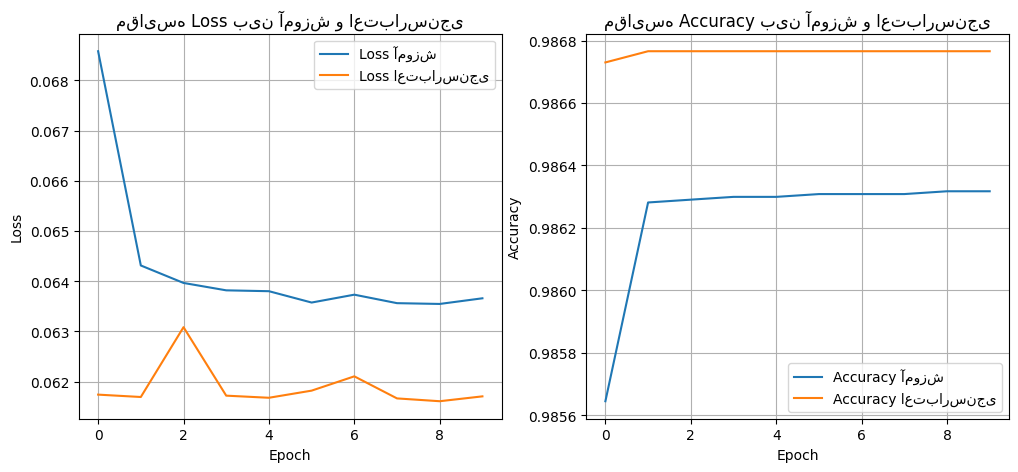

In [ ]:
import matplotlib.pyplot as plt

# üìä ÿ±ÿ≥ŸÖ ŸÜŸÖŸàÿØÿßÿ± Loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss ÿ¢ŸÖŸàÿ≤ÿ¥')
plt.plot(history.history['val_loss'], label='Loss ÿßÿπÿ™ÿ®ÿßÿ±ÿ≥ŸÜÿ¨€å')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('ŸÖŸÇÿß€åÿ≥Ÿá Loss ÿ®€åŸÜ ÿ¢ŸÖŸàÿ≤ÿ¥ Ÿà ÿßÿπÿ™ÿ®ÿßÿ±ÿ≥ŸÜÿ¨€å')
plt.legend()
plt.grid()

# üìä ÿ±ÿ≥ŸÖ ŸÜŸÖŸàÿØÿßÿ± Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy ÿ¢ŸÖŸàÿ≤ÿ¥')
plt.plot(history.history['val_accuracy'], label='Accuracy ÿßÿπÿ™ÿ®ÿßÿ±ÿ≥ŸÜÿ¨€å')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('ŸÖŸÇÿß€åÿ≥Ÿá Accuracy ÿ®€åŸÜ ÿ¢ŸÖŸàÿ≤ÿ¥ Ÿà ÿßÿπÿ™ÿ®ÿßÿ±ÿ≥ŸÜÿ¨€å')
plt.legend()
plt.grid()

plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


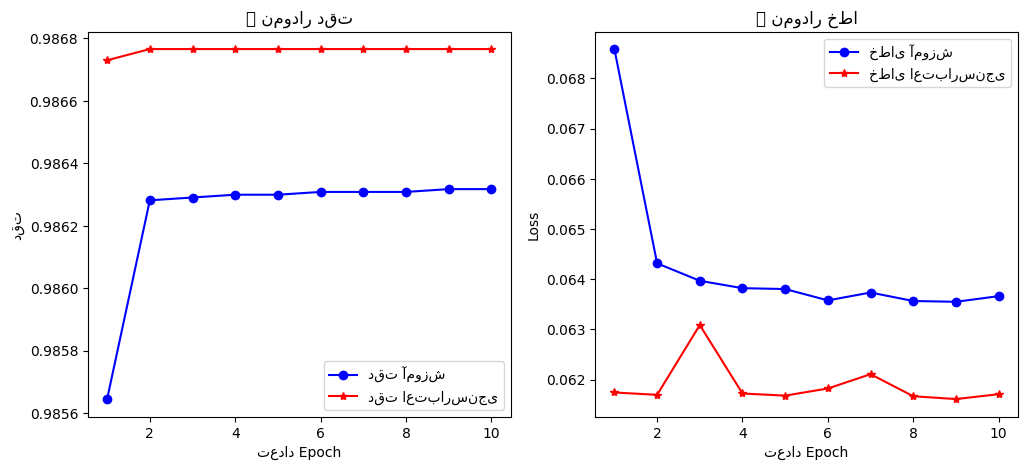

‚úÖ ÿ®€åÿ¥‚Äåÿ®ÿ±ÿßÿ≤ÿ¥ ÿ±ÿÆ ŸÜÿØÿßÿØŸá ÿßÿ≥ÿ™. ŸÖÿØŸÑ ÿ®Ÿá ÿÆŸàÿ®€å ÿ±Ÿà€å ÿØÿßÿØŸá‚ÄåŸáÿß€å ÿßÿπÿ™ÿ®ÿßÿ±ÿ≥ŸÜÿ¨€å ÿ™ÿπŸÖ€åŸÖ €åÿßŸÅÿ™Ÿá ÿßÿ≥ÿ™.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def check_overfitting(history, threshold=0.05):
    """
    ÿ®ÿ±ÿ±ÿ≥€å ÿ®€åÿ¥‚Äåÿ®ÿ±ÿßÿ≤ÿ¥ (Overfitting) ÿ®ÿß ŸÖŸÇÿß€åÿ≥Ÿá ÿØŸÇÿ™ Ÿà ÿÆÿ∑ÿß€å ÿØÿßÿØŸá‚ÄåŸáÿß€å ÿ¢ŸÖŸàÿ≤ÿ¥€å Ÿà ÿßÿπÿ™ÿ®ÿßÿ±ÿ≥ŸÜÿ¨€å.

    - history: ÿ¥€åÿ° History ⁄©Ÿá ÿßÿ≤ model.fit() ÿ®Ÿá ÿØÿ≥ÿ™ ŸÖ€å‚Äåÿ¢€åÿØ.
    - threshold: ÿ¢ÿ≥ÿ™ÿßŸÜŸá‚Äåÿß€å ⁄©Ÿá ÿß⁄Øÿ± ÿßÿÆÿ™ŸÑÿßŸÅ loss ÿßÿ≤ ÿ¢ŸÜ ÿ®€åÿ¥ÿ™ÿ± ÿ¥ŸàÿØÿå ŸÖÿØŸÑ ÿ±ÿß ÿ®€åÿ¥‚Äåÿ®ÿ±ÿßÿ≤ÿ¥ ÿØÿ± ŸÜÿ∏ÿ± ŸÖ€å‚Äå⁄Ø€åÿ±€åŸÖ.
    """

    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']

    # ŸÖÿ≠ÿßÿ≥ÿ®Ÿá ÿßÿÆÿ™ŸÑÿßŸÅ ÿØŸÇÿ™ Ÿà ÿÆÿ∑ÿß ÿ®€åŸÜ ÿØÿßÿØŸá‚ÄåŸáÿß€å ÿ¢ŸÖŸàÿ≤ÿ¥€å Ÿà ÿßÿπÿ™ÿ®ÿßÿ±ÿ≥ŸÜÿ¨€å
    acc_gap = np.abs(np.array(train_acc) - np.array(val_acc))
    loss_gap = np.abs(np.array(train_loss) - np.array(val_loss))

    # ÿ®ÿ±ÿ±ÿ≥€å ÿ¢€åÿß ÿ®€åÿ¥‚Äåÿ®ÿ±ÿßÿ≤ÿ¥ ÿ±ÿÆ ÿØÿßÿØŸá ÿßÿ≥ÿ™ÿü
    overfitting_detected = np.any(loss_gap > threshold)

    # üìà ÿ±ÿ≥ŸÖ ŸÜŸÖŸàÿØÿßÿ± ÿØŸÇÿ™ Ÿà ÿÆÿ∑ÿß
    epochs = range(1, len(train_acc) + 1)

    plt.figure(figsize=(12, 5))

    # üìä ŸÜŸÖŸàÿØÿßÿ± ÿØŸÇÿ™
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_acc, 'bo-', label='ÿØŸÇÿ™ ÿ¢ŸÖŸàÿ≤ÿ¥')
    plt.plot(epochs, val_acc, 'r*-', label='ÿØŸÇÿ™ ÿßÿπÿ™ÿ®ÿßÿ±ÿ≥ŸÜÿ¨€å')
    plt.xlabel('ÿ™ÿπÿØÿßÿØ Epoch')
    plt.ylabel('ÿØŸÇÿ™')
    plt.title('üìä ŸÜŸÖŸàÿØÿßÿ± ÿØŸÇÿ™')
    plt.legend()

    # üìä ŸÜŸÖŸàÿØÿßÿ± ÿÆÿ∑ÿß (Loss)
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_loss, 'bo-', label='ÿÆÿ∑ÿß€å ÿ¢ŸÖŸàÿ≤ÿ¥')
    plt.plot(epochs, val_loss, 'r*-', label='ÿÆÿ∑ÿß€å ÿßÿπÿ™ÿ®ÿßÿ±ÿ≥ŸÜÿ¨€å')
    plt.xlabel('ÿ™ÿπÿØÿßÿØ Epoch')
    plt.ylabel('Loss')
    plt.title('üìä ŸÜŸÖŸàÿØÿßÿ± ÿÆÿ∑ÿß')
    plt.legend()

    plt.show()

    # üõë ŸÜŸÖÿß€åÿ¥ ŸÜÿ™€åÿ¨Ÿá
    if overfitting_detected:
        print("‚ö†Ô∏è ÿ®€åÿ¥‚Äåÿ®ÿ±ÿßÿ≤ÿ¥ (Overfitting) ÿ±ÿÆ ÿØÿßÿØŸá ÿßÿ≥ÿ™! ŸÖÿØŸÑ ÿ±Ÿà€å ÿØÿßÿØŸá‚ÄåŸáÿß€å ÿ¢ŸÖŸàÿ≤ÿ¥€å ÿÆ€åŸÑ€å ÿÆŸàÿ® ÿπŸÖŸÑ ⁄©ÿ±ÿØŸá ÿßŸÖÿß ÿ±Ÿà€å ÿØÿßÿØŸá‚ÄåŸáÿß€å ÿßÿπÿ™ÿ®ÿßÿ±ÿ≥ŸÜÿ¨€å ÿπŸÖŸÑ⁄©ÿ±ÿØ ÿ∂ÿπ€åŸÅ‚Äåÿ™ÿ±€å ÿØÿßÿ±ÿØ.")
    else:
        print("‚úÖ ÿ®€åÿ¥‚Äåÿ®ÿ±ÿßÿ≤ÿ¥ ÿ±ÿÆ ŸÜÿØÿßÿØŸá ÿßÿ≥ÿ™. ŸÖÿØŸÑ ÿ®Ÿá ÿÆŸàÿ®€å ÿ±Ÿà€å ÿØÿßÿØŸá‚ÄåŸáÿß€å ÿßÿπÿ™ÿ®ÿßÿ±ÿ≥ŸÜÿ¨€å ÿ™ÿπŸÖ€åŸÖ €åÿßŸÅÿ™Ÿá ÿßÿ≥ÿ™.")

# üìå ÿßÿ≥ÿ™ŸÅÿßÿØŸá ÿßÿ≤ ÿ™ÿßÿ®ÿπ ÿ®ÿ±ÿß€å ÿ®ÿ±ÿ±ÿ≥€å ŸÖÿØŸÑ
check_overfitting(history)
